In [574]:
#Importing needed modules.
from pandas import read_csv , DataFrame , plotting
from matplotlib.pyplot import show , pie , title 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
#Instancing from 'StandardScaler' object
scaler = StandardScaler()

In [517]:
#Reading csv file and extracting 10 samples randomly.
path = "D:\\datasets\\diabetes\\diabetes.csv"
file = read_csv(path)
df = file.copy()
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
477,7,114,76,17,110,23.8,0.466,31,0
291,0,107,62,30,74,36.6,0.757,25,1
473,7,136,90,0,0,29.9,0.210,50,0
546,5,187,76,27,207,43.6,1.034,53,1
417,4,144,82,32,0,38.5,0.554,37,1
471,0,137,70,38,0,33.2,0.170,22,0
517,7,125,86,0,0,37.6,0.304,51,0
664,6,115,60,39,0,33.7,0.245,40,1
689,1,144,82,46,180,46.1,0.335,46,1
741,3,102,44,20,94,30.8,0.400,26,0


In [518]:
#Getting information from dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [519]:
#Dropping label column from dataset.
label = df.Outcome
df = df.drop(['Outcome'],axis=1)

In [520]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [521]:
#Features scaling.
scaled_df = DataFrame(scaler.fit_transform(df),columns=df.columns)

In [522]:
scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


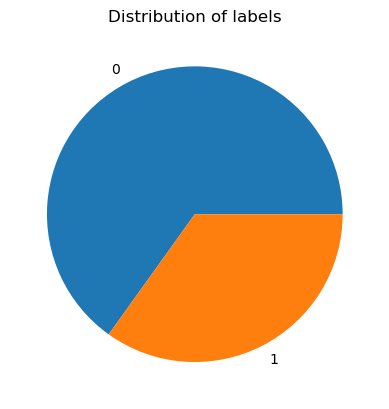

In [566]:
pie([label.to_list().count(0),label.to_list().count(1)],labels=[0,1])
title('Distribution of labels')
show()

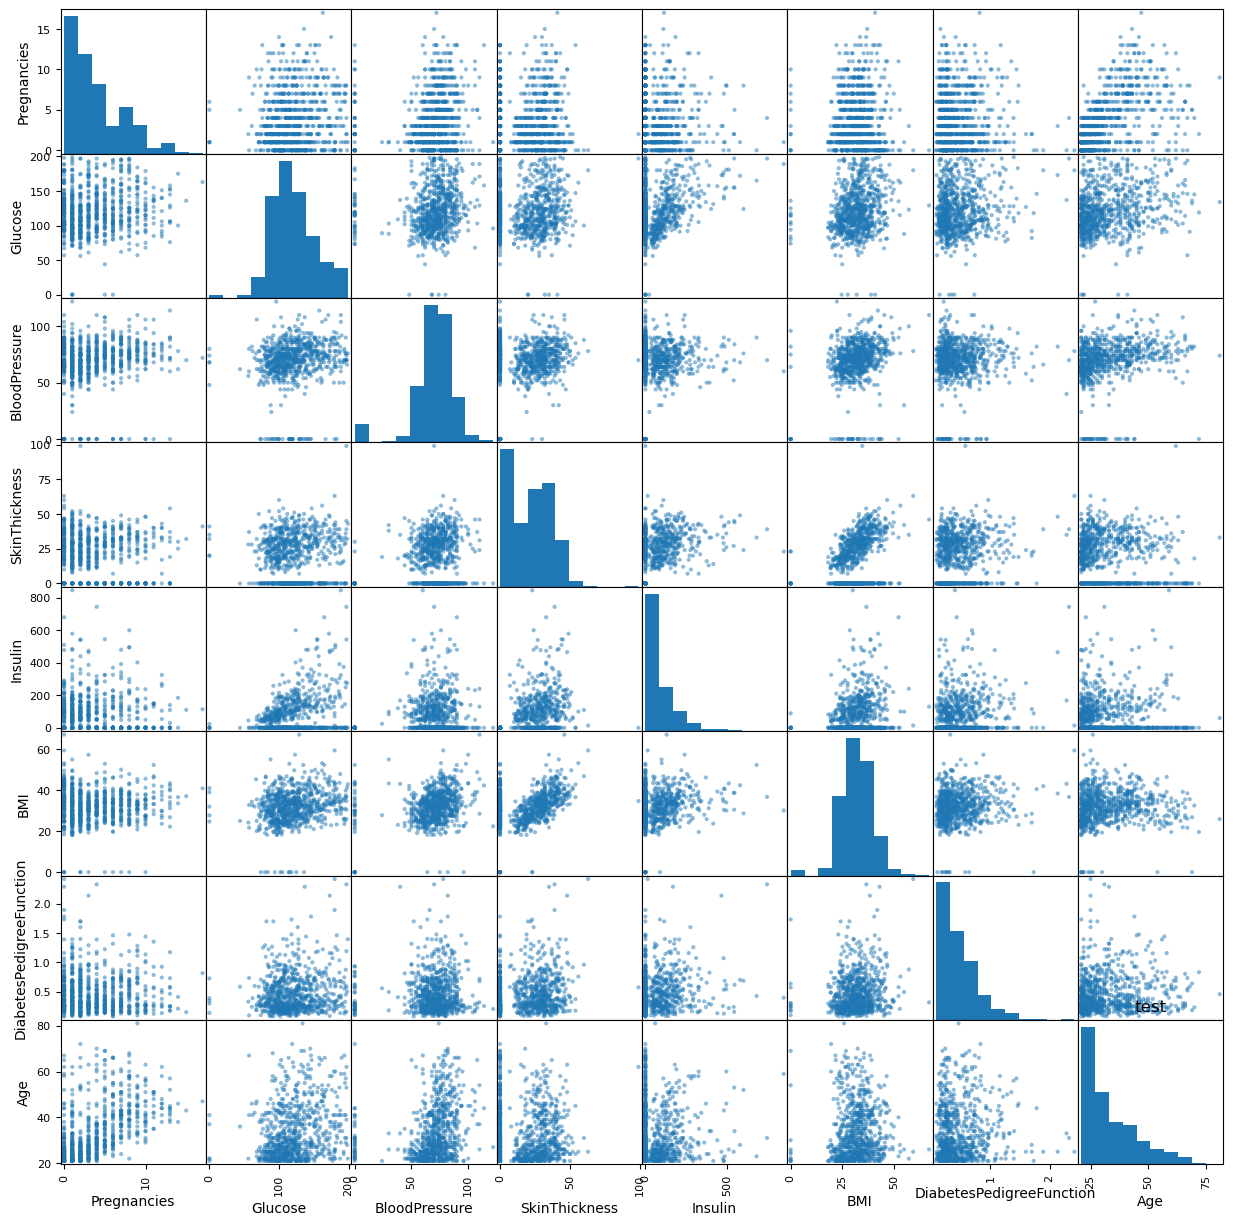

In [573]:
plotting.scatter_matrix(df,figsize=(15,15))
show()

There is no clear relationship between the features.

In [525]:
#Splitting dataset to train and test set.
xtr , xts , ytr , yts = train_test_split(scaled_df,label,test_size=0.05,random_state=0)

In [568]:
print('Number of samples in train set:')
print(len(xtr))
print('Number of samples in train set:')
print(len(xts))

Number of samples in train set
729
Number of samples in train set
39


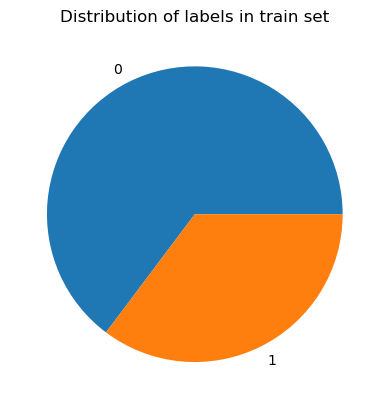

In [570]:
pie([ytr.tolist().count(0),ytr.tolist().count(1)],labels=[0,1])
title('Distribution of labels in train set')
show()

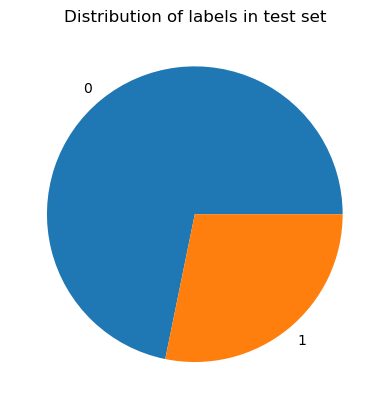

In [571]:
pie([yts.tolist().count(0),yts.tolist().count(1)],labels=[0,1])
title('Distribution of labels in test set')
show()

In [551]:
#Creating a model.
Teacher = RandomForestClassifier()

In [552]:
#Training train dataset.
Teacher.fit(xtr,ytr)

RandomForestClassifier()

In [553]:
#Model performance on train dataset.
pred_tr = Teacher.predict(xtr)
accuracy_score(ytr,pred_tr)*100

100.0

In [554]:
#Model performance on test dataset.
pred_ts = Teacher.predict(xts)
accuracy_score(yts,pred_ts)*100

92.3076923076923

In [555]:
#Model performance on full dataset.
Teacher.fit(scaled_df,label)
pred = Teacher.predict(scaled_df)
accuracy_score(label,pred)*100

100.0

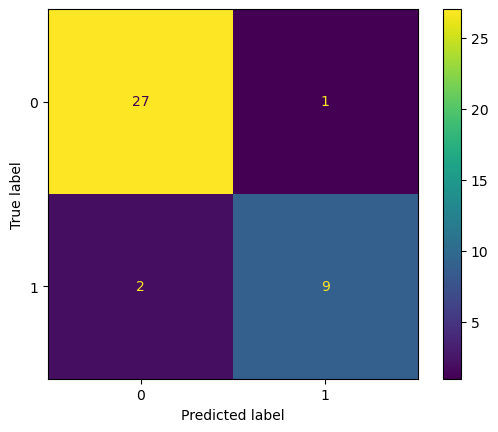

In [593]:
#Plotting confusion matrix.
c_matrix = confusion_matrix(yts,pred_ts)
display = ConfusionMatrixDisplay(c_matrix)
display.plot()

In [589]:
#Analyzing different models performances.
models = [GradientBoostingClassifier,
         DecisionTreeClassifier,
         XGBClassifier,
         LogisticRegression,
         RidgeClassifier]

Model: GradientBoostingClassifier
Accuracy on train set 90.39780521262003
Accuracy on test set 84.61538461538461
Accuracy on train set 90.625
--------------------------------------------------------
Model: DecisionTreeClassifier
Accuracy on train set 100.0
Accuracy on test set 76.92307692307693
Accuracy on train set 100.0
--------------------------------------------------------
Model: XGBClassifier
Accuracy on train set 100.0
Accuracy on test set 76.92307692307693
Accuracy on train set 100.0
--------------------------------------------------------
Model: LogisticRegression
Accuracy on train set 77.50342935528121
Accuracy on test set 92.3076923076923
Accuracy on train set 78.38541666666666
--------------------------------------------------------
Model: RidgeClassifier
Accuracy on train set 77.09190672153635
Accuracy on test set 92.3076923076923
Accuracy on train set 78.38541666666666
--------------------------------------------------------


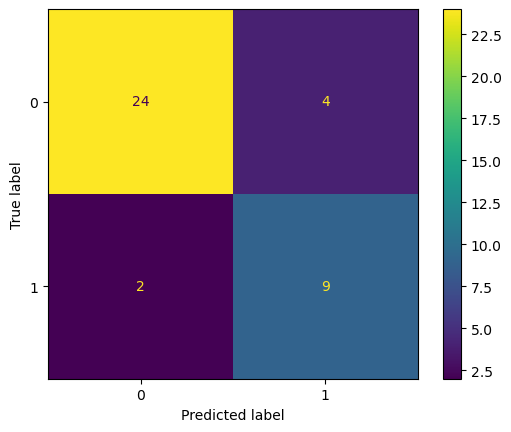

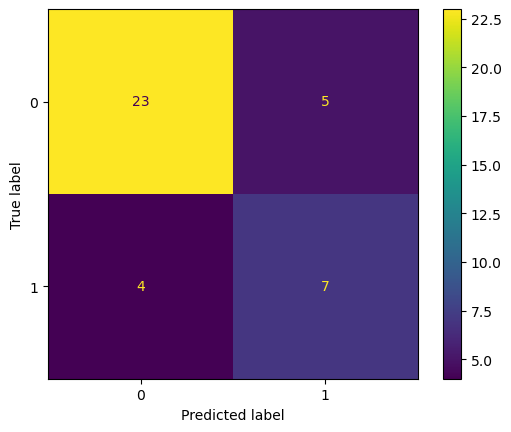

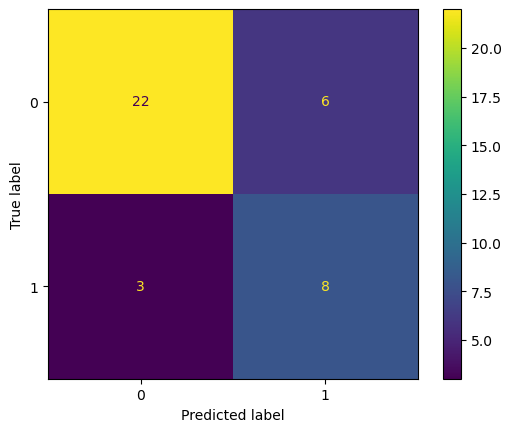

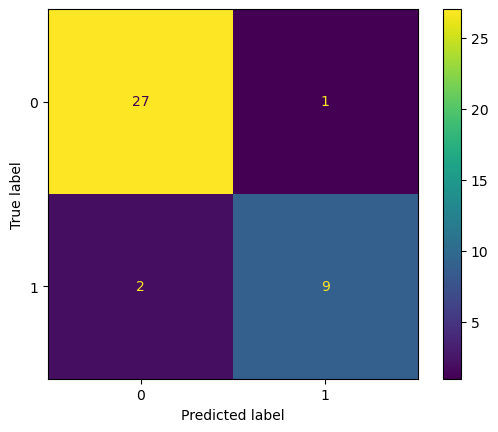

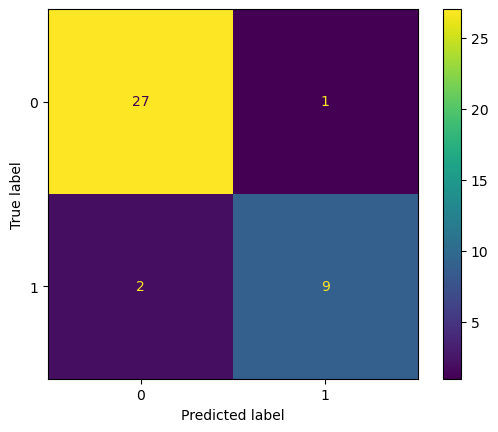

In [592]:
for model in  models :
    print('Model:',str(model).split('.')[-1][:-2])
    alg = model()
    alg.fit(xtr,ytr)
    pred = alg.predict(xtr)
    print('Accuracy on train set',accuracy_score(ytr,pred)*100)
    pred_ts = alg.predict(xts)
    print('Accuracy on test set',accuracy_score(yts,pred_ts)*100)
    alg.fit(scaled_df,label)
    pred = alg.predict(scaled_df)
    print('Accuracy on train set',accuracy_score(label,pred)*100)
    c_matrix = confusion_matrix(yts,pred_ts)
    display = ConfusionMatrixDisplay(c_matrix)
    display.plot()
    print('--------------------------------------------------------')